# Breast Cancer Classification

## Importing needed libraries;

In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

# to ignore warnings;
import warnings
warnings.filterwarnings("ignore")

## Importing dataset and minor fixes on it;

In [248]:
df = pd.read_csv("cancer.csv", sep = ",")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 2 features that will not be used in the dataset. Deleting these unnecessary columns;

In [249]:
df.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


A small visualization to examine the dependent variable for the first time; 

B    357
M    212
Name: diagnosis, dtype: int64

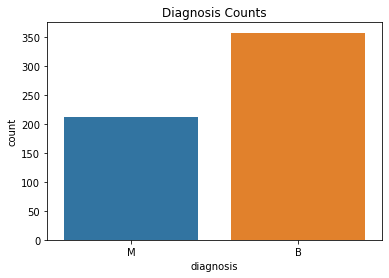

In [250]:
sns.countplot(df["diagnosis"])
plt.title("Diagnosis Counts");
df.diagnosis.value_counts()

To facilitate operations on these variables by changing the values of "M" and "B", which are the values of the dependent variable, to "1" and "0"; 

In [251]:
df["diagnosis"] = [1 if i.strip() == "M" else 0 for i in df.diagnosis]

In [252]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


How many samples and features does the dataset has?

In [253]:
df.shape

(569, 31)

This dataset has 569 samples and 31 features.

Is there any missing values in dataset?

In [254]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no missing values in dataset.

## Exploratory Data Analysis (EDA)

### Examining correlation;

In [255]:
corr_matrix = df.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


Visualization of correlation matrix;

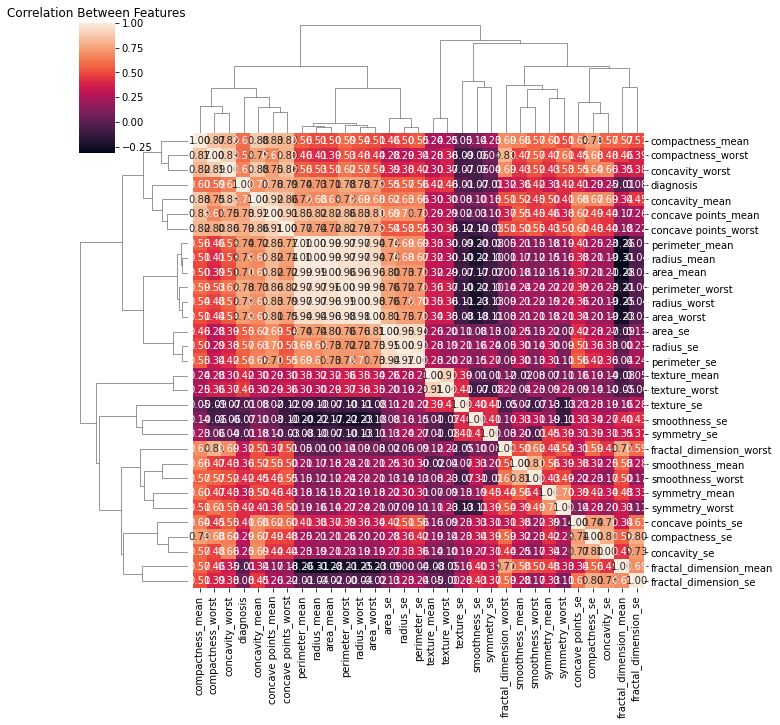

In [256]:
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features");

## Outlier

Finding the outliers;

In [257]:
y = df.diagnosis
x = df.drop(["diagnosis"], axis = 1)
columns = x.columns.tolist()

In [258]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(x)

In [259]:
X_score = lof.negative_outlier_factor_

In [260]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
outlier_score.head()

,score
0,-1.422440
1,-1.066782
2,-0.978948
3,-1.596933
4,-1.069936


### Visualization of outlier scores;

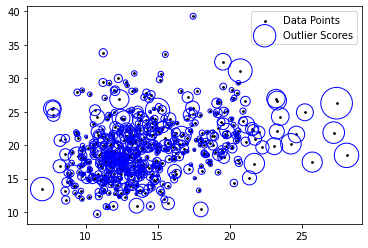

In [261]:
plt.figure()
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points") # Visualization of data points
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min()) # Defining radius for each data point
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "b", facecolors = "none", label = "Outlier Scores") # Visualization of radius'
plt.legend();

### Thresholding and visualization;

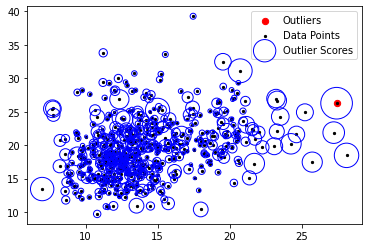

In [262]:
threshold = -2.5 # Defining a threshold level
filt1 = outlier_score["score"] < threshold # Defining threshold filter that separating values below the threshold level 
outlier_index = outlier_score[filt1].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = "r", s = 40, label = "Outliers") # Visualization of outliers
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 5, label = "Data Points") # Visualization of data points
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "b", facecolors = "none", label = "Outlier Scores") # Visualization of radius'
plt.legend();

### Dropping outliers;

In [263]:
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

## Splitting dataset

In [264]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Standardization

In [265]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [266]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.126206,-0.106331,-0.139113,-0.243152,0.200584,0.082163,-0.426589,-0.287204,-0.345793,0.802295,...,-0.243869,0.026662,-0.235439,-0.316803,0.456859,0.060010,-0.359469,0.218125,-0.054096,0.396185
1,1.110155,0.350378,1.085508,0.972350,0.516224,0.541814,0.433900,1.051074,0.668203,-0.276397,...,1.026425,-0.008771,0.960829,0.869669,0.705777,0.841678,0.340937,1.293014,0.281891,0.093907
2,-1.565931,-0.763715,-1.524658,-1.225782,1.326652,-0.408721,-0.589335,-0.780730,-0.582878,1.903286,...,-1.410326,-0.941303,-1.316628,-1.082299,1.762589,-0.075060,-0.092330,-0.146403,0.068515,1.048258
3,0.567081,-0.251647,0.550500,0.456043,0.061958,0.213772,0.101004,0.286230,0.190385,-0.026932,...,0.779600,-0.031319,0.679317,0.656981,-0.027877,-0.160648,0.085079,0.112194,-0.144860,-0.103605
4,-0.487293,0.172769,-0.488764,-0.531209,-0.840888,-0.027839,-0.238905,-0.468792,-0.101412,-0.025539,...,-0.594955,-0.385649,-0.585008,-0.592932,-1.180763,-0.212804,-0.375364,-0.594274,-0.315243,-0.329168


## KNN Method

### Basic KNN Method

In [267]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [268]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(X_test, y_test)

In [269]:
print("Correlation Matrix: ", cm)

Correlation Matrix:  [[108   1]
 [  7  55]]


In [270]:
print("Accuracy: ", acc)

Accuracy:  0.9532163742690059


In [271]:
print("KNN Score: ", score)

KNN Score:  0.9532163742690059


### KNN Model Tuning

In [272]:
def KNN_Best_Params(X_train, X_test, y_train, y_test):
    
    knn_params = {'n_neighbors': np.arange(1,100,1), 'weights' : ["uniform", "distance"]}
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, knn_params, cv = 10, scoring = "accuracy")
    grid.fit(X_train, y_train)
    
    print("Best training score : {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    
    knn_tuned = KNeighborsClassifier(n_neighbors = grid.best_params_["n_neighbors"], weights = grid.best_params_["weights"])
    knn_tuned.fit(X_train, y_train)
    
    y_pred_test = knn_tuned.predict(X_test)
    y_pred_train = knn_tuned.predict(X_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print("CM Test: ", cm_test)
    print("CM Train: ", cm_train)
    
    return grid

In [273]:
grid = KNN_Best_Params(X_train, X_test, y_train, y_test)

Best training score : 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}
Test Score: 0.9590643274853801, Train Score: 0.9773299748110831
CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


## Principal Component Analysis (PCA)

We are making a dimension reduction here. We are transforming 30 dimensions to 2 dimensions.

In [274]:
scaler1 = StandardScaler()

In [275]:
X_scaled = scaler1.fit_transform(x)

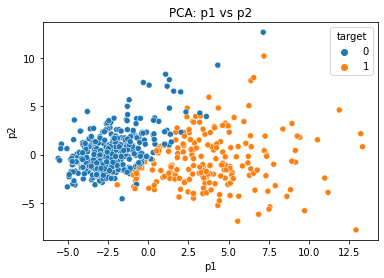

In [276]:
pca = PCA(n_components = 2)
pca.fit(X_scaled)
X_reduced_pca = pca.transform(X_scaled)
pca_df = pd.DataFrame(X_reduced_pca, columns = ["p1", "p2"])
pca_df["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_df)
plt.title("PCA: p1 vs p2");

In [277]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.3, random_state = 42)

Performance of tuned PCA model;

In [278]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, y_train_pca, y_test_pca)

Best training score : 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Test Score: 0.9239766081871345, Train Score: 0.947103274559194
CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


### Visualization of PCA

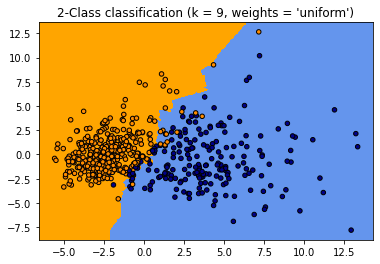

In [279]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights));

## Neighborhood Components Analysis (NCA)

Text(0.5, 1.0, 'NCA: p1 vs p2')

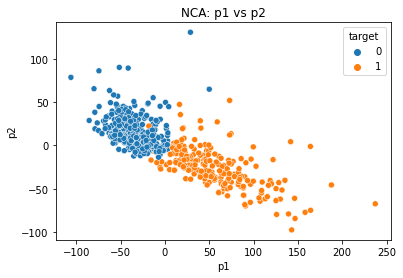

In [280]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_df = pd.DataFrame(X_reduced_nca, columns = ["p1", "p2"])
nca_df["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = nca_df)
plt.title("NCA: p1 vs p2")

In [281]:
X_train_nca, X_test_nca, y_train_nca, y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.3, random_state = 42)

Performance of tuned NCA model;

In [282]:
grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, y_train_nca, y_test_nca)

Best training score : 0.9873076923076922 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Test Score: 0.9941520467836257, Train Score: 1.0
CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


### Visualization of NCA

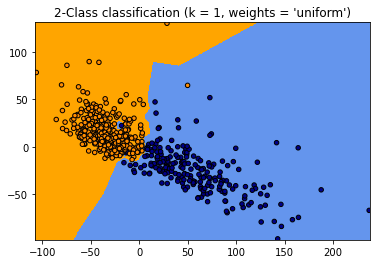

In [283]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights));

### Finding wrong decision

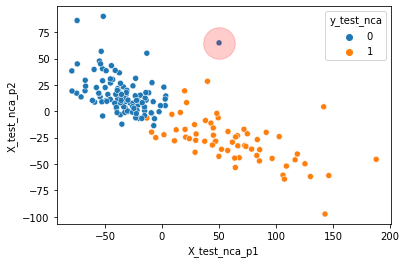

In [284]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,y_test_nca)
knn.score(X_test_nca,y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["y_test_nca"] = y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000);